In [1]:
import os
import argparse
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy.sparse as sp
import matplotlib.pyplot as plt
from gat_lstm import STDN

D:\app2018\Anaconda35\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\app2018\Anaconda35\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\app2018\Anaconda35\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\app2018\Anaconda35\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1)

In [2]:
'''
#城市，时间，站点，特征（5,6,7,8）
def load_random_data(size):

    adj = sp.random(size, size, density=0.1) # density similar to cora
    features = sp.random(size, 32, density=0.5)
    int_labels = np.random.randint(1, size=(size))
    labels = np.random.rand(size, 1) # Nx7
    labels[np.arange(size), int_labels] = 1

    train_mask = np.zeros((size,)).astype(bool)
    train_mask[np.arange(size)[0:int(size/2)]] = 1

    val_mask = np.zeros((size,)).astype(bool)
    val_mask[np.arange(size)[int(size/2):]] = 1

    test_mask = np.zeros((size,)).astype(bool)
    test_mask[np.arange(size)[int(size/2):]] = 1

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]
  
    # sparse NxN, sparse NxF, norm NxC, ..., norm Nx1, ...
    return adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask

def preprocess_features(features):
    """Row-normalize feature matrix and convert to tuple representation"""
    rowsum = np.array(features.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    features = r_mat_inv.dot(features)
    return features.todense(), sparse_to_tuple(features)

def sparse_to_tuple(sparse_mx):
    """Convert sparse matrix to tuple representation."""
    def to_tuple(mx):
        if not sp.isspmatrix_coo(mx):
            mx = mx.tocoo()
        coords = np.vstack((mx.row, mx.col)).transpose()
        values = mx.data
        shape = mx.shape
        return coords, values, shape

def adj_to_bias(adj, sizes, nhood=1):
    nb_graphs = adj.shape[0]
    mt = np.empty(adj.shape)
    for g in range(nb_graphs):
        mt[g] = np.eye(adj.shape[1])
        for _ in range(nhood):
            mt[g] = np.matmul(mt[g], (adj[g] + np.eye(adj.shape[1])))
        for i in range(sizes[g]):
            for j in range(sizes[g]):
                if mt[g][i][j] > 0.0:
                    mt[g][i][j] = 1.0
    return -1e9 * (1.0 - mt)
    
    
    
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask = load_random_data(512)
features, spars = preprocess_features(features)
adj = adj.todense()
#生成一维时间维度
features = features[np.newaxis]
adj = adj[np.newaxis]
y_train = y_train[np.newaxis]
y_val = y_val[np.newaxis]
y_test = y_test[np.newaxis]
train_mask = train_mask[np.newaxis]
val_mask = val_mask[np.newaxis]
test_mask = test_mask[np.newaxis]

biases = adj_to_bias(adj, [32], nhood=1)

#生成数据
features = tf.reshape(features, [-1, 32,16])
features = tf.dtypes.cast(features, tf.float32)
sess = tf.Session()
with sess.as_default():
    features = features.eval()

biases = np.reshape(biases,(-1,32,32))
biases = biases[0:32]

#y_train = np.asarray(y_train)
y_train = np.reshape(y_train,(-1,32,1))[0:1]
y_val = np.reshape(y_val,(-1,32,1))[0:1]
y_test = np.reshape(y_test,(-1,32,1))[0:1]

train_mask = np.reshape(train_mask,(16,32))
val_mask = np.reshape(val_mask,(16,32))
test_mask = np.reshape(test_mask,(16,32))

#增加一维城市
features = features[np.newaxis]
adj = adj[np.newaxis]
train_mask = train_mask[np.newaxis]
val_mask = val_mask[np.newaxis]
test_mask = test_mask[np.newaxis]
biases = biases[np.newaxis]

print(features.shape)
print(biases.shape)
print(y_train.shape)
print(train_mask.shape)


(cities,alltime,nodenum,features)
(alltime,node,features)
(bach_size,seq_length,nodenum,features)
for b in bach_size:
    #(seq_length,nodenum,features)
    #gatlayer
    #(seq_length,nodenum,features)
    for s in seq_length:
        (nodenum,features)
        gatlayer
        (nodenum,features)
        (nodenum,features)
        LSTM
    predict(nodenum,aqi)
（seq_length,nodenum,features）
'''
def load_data(distance,nodenum,train_test):
    data = np.load('../data/fourCity.npy')
    data[np.isnan(data)]=0
    A = np.load('../data/fourCityA.npy')
    A[np.isnan(A)]=0
    A[A <= distance] = 1.
    A[A > distance] = 0.
    #只关心与nodenum相关的监测点
    
    A[:,0:nodenum,0:nodenum] = 0
    A[:,nodenum+1:,0:nodenum] = 0
    A[:,0:nodenum:,nodenum+1:] = 0
    A[:,nodenum+1:,nodenum+1:] = 0
    
    #（city,alltime,nodenum,feature）
    label = data[:,:,:,data.shape[2]-1:]
    
    #label = label[np.newaxis]
    print(label.shape)
    #（timestep*batchsize，node，features）
    train = data[:,:,:,:-1]
    #train = train[np.newaxis]
    input_a, label_a = train[:,0:train_test,:,:],label[:,0:train_test,:]
    input_b, label_b = train[:,train_test:,:,:],label[:,train_test:,:]
    A = A[np.newaxis]
    return input_a, label_a,input_b, label_b,A
def load_data2(distance,nodenum,trainnum,testnum,targetnum):
    data = np.load('../data/fourCity.npy')
    data[np.isnan(data)]=0
    A = np.load('../data/fourCityA.npy')
    A[np.isnan(A)]=0
    A[A <= distance] = 1.
    A[A > distance] = 0.
    #只关心与nodenum相关的监测点
    
    A[:,0:nodenum,0:nodenum] = 0
    A[:,nodenum+1:,0:nodenum] = 0
    A[:,0:nodenum:,nodenum+1:] = 0
    A[:,nodenum+1:,nodenum+1:] = 0
    
    #（city,alltime,nodenum,feature）
    label = data[:,:,:,data.shape[3]-1:]
    
    #label = label[np.newaxis]
    print(label.shape)
    #（timestep*batchsize，node，features）
    train = data[:,:,:,:-1]
    #train = train[np.newaxis]
    #源城市
    input_a, label_a = train[0:3,0:trainnum,:,:],label[0:3,0:trainnum,:,:]
    input_b, label_b = train[0:3,0:testnum,:,:],label[0:3,0:testnum,:,:]
    #目标城市
    input_t, label_t = train[3,0:targetnum,:,:],label[3,0:targetnum,:,:]
    input_t = input_t[np.newaxis]
    label_t = label_t[np.newaxis]
    #A = A[np.newaxis]
    return input_a, label_a,input_b, label_b,input_t,label_t,A

def normal(w):
    mean = np.mean(w,axis = 0)
    var = np.var(w,axis = 0)
    resultW = np.round((w - mean)/np.sqrt(var +0.001),decimals = 7)
    return resultW

In [3]:
def train(model, sess, saver):
    '''
    biasesb = np.zeros([cities,42, 42])
    biasesb[0] = A[3,:,:]
    biasesb[1] = A[3,:,:]
    biasesb[2] = A[3,:,:]
    '''
    outputs = None
    
    for epoch in range(iterations): 
        
        inputa = np.zeros([cities,update_batch_size, seq_length, 42,17])
        inputb = np.zeros([cities,update_batch_size, seq_length, 42,17])
        labela = np.zeros([cities,update_batch_size, 1])
        labelb = np.zeros([cities,update_batch_size, 1])
        #update_batch_size
        num = 0
        k = seq_length
        #每一次迭代 的训练次数（batch的个数）
        remm = 0
        #总误差
        sum1 = 0.0
        sum2 = 0.0
        #设置batch
        for i in range(seq_length,input_a.shape[1]):
            #batch_size
            inputa[0][num] = input_a[0,i-seq_length:i,:,:] 
            labela[0][num][0] = label_a[0,i,node_num,0]
            
            inputa[1][num] = input_a[1,i-seq_length:i,:,:] 
            labela[1][num][0] = label_a[1,i,node_num,0]
            
            inputa[2][num] = input_a[2,i-seq_length:i,:,:] 
            labela[2][num][0] = label_a[2,i,node_num,0]
            
            inputb[0][num] = input_b[0,k-seq_length:k,:,:] 
            labelb[0][num][0] = label_b[0,k,node_num,0]
            inputb[1][num] = input_b[1,k-seq_length:k,:,:] 
            labelb[1][num][0] = label_b[1,k,node_num,0]
            inputb[2][num] = input_b[2,k-seq_length:k,:,:] 
            labelb[2][num][0] = label_b[2,k,node_num,0]
            
            k = k + 1
            if k == input_b.shape[1]:
                k = seq_length 
            num = num + 1
            #凑够一个batch
            if num % update_batch_size == 0: 
                num = 0
                #train
                feed_dict = {model.inputa: inputa, 
                             model.inputb: inputb,
                             model.labela: labela, 
                             model.labelb: labelb,
                             #ftr_in: features[vl_step*batch_size:(vl_step+1)*batch_size],
                             model.bias_ina: biasesa,
                             model.bias_inb: biasesb,
                             #lbl_in: y_val[vl_step*batch_size:(vl_step+1)*batch_size],
                             #model.msk_in: val_mask,
                             model.is_train: True,
                             model.attn_drop: 0.0, model.ffd_drop: 0.0
                        }
                remm = remm + 1
                
                if epoch % 10 == 0:
                    #model_file = 'model' + "/" + model_type + "/model_" + str(epoch)
                    #saver.save(sess, model_file)
                    res = sess.run([model.total_rmse1, model.total_rmse2,model.outputas, model.outputbs], feed_dict)
                    outputas = res[2]
                    outputbs = res[3]
                    sum1 = sum1 + res[0][0]
                    sum2 = sum2 + res[1][0]
                    print('【res】',epoch, res[0:2])
                    #绘制图像
                    if remm == 50:
                        rowdataa = pd.DataFrame(labela[0],columns=['predict'])
                        rowdataa.to_csv('rowdataa50.csv')
                        labela_ = normal(labela[0])
                        rowdatab = pd.DataFrame(labelb[0],columns=['predict'])
                        rowdatab.to_csv('rowdatab50.csv')
                        labelb_ = normal(labelb[0])
                        fig = plt.figure()
                        plt.rc('figure',figsize=(20,10))
                        ax0 = fig.add_subplot(2,1,1)
                        ax1 = fig.add_subplot(2,1,2)
                        #训练
                        writedataoa = pd.DataFrame(outputas[0],columns=['predict'])
                        writedataoa.to_csv('outputa'+ str(epoch) +'.csv')
                        writedatala = pd.DataFrame(labela_,columns=['observer'])
                        writedatala.to_csv('labela'+str(epoch)+'.csv')
                        ax0.plot(outputas[0],'red',label='predict')
                        ax0.plot(labela_,'blue',label='observer')
                        #测试
                        writedataob = pd.DataFrame(outputbs[0][0],columns=['predict'])
                        writedataob.to_csv('outputb'+ str(epoch) +'.csv')
                        writedatalb = pd.DataFrame(labelb_,columns=['observer'])
                        writedatalb.to_csv('labelb'+str(epoch)+'.csv')
                        ax1.plot(outputbs[0][0],'red',label='predict')
                        ax1.plot(labelb_,'blue',label='observer')
                        plt.show()
                    
                else:
                    #元训练
                    if "meta" in model_type:
                        sess.run([model.metatrain_op], feed_dict)
                    elif "pretrain" in model_type:
                    #预训练
                        sess.run([model.pretrain_op], feed_dict)
        
        print('训练集平均rmes',sum1/remm)
        print('测试集平均rmes',sum2/remm)

In [ ]:
def test(model, sess, saver):
    
    for epoch in range(iterations): 
        inputa = np.zeros([cities,update_batch_size, seq_length, 42,17])        
        labela = np.zeros([cities,update_batch_size, 1])
        #update_batch_size
        num = 0
        #每一次迭代 的训练次数
        remm = 0
        #总误差
        sum1 = 0.0
        sum2 = 0.0
        
        total_test_loss = []
        total_outputa = []
        
        for i in range(seq_length,input_a.shape[1]):
            #batch_size
            inputa[0][num] = input_a[0,i-seq_length:i,:,:] 
            labela[0][num][0] = label_a[0,i,node_num,0]
            
            inputa[1][num] = input_a[0,i-seq_length:i,:,:] 
            labela[1][num][0] = label_a[0,i,node_num,0]
            
            inputa[2][num] = input_a[0,i-seq_length:i,:,:] 
            labela[2][num][0] = label_a[0,i,node_num,0]
        
            num = num + 1
            if num % update_batch_size == 0: 
                num = 0                
                feed_dict = {model.inputa: inputa, model.labela: labela, model.bias_ina: biasest, model.is_train: False,
                             model.attn_drop: 0.0, model.ffd_drop: 0.0}                        
                remm = remm + 1
                outputa, loss1, = sess.run([model.outputas, model.total_loss1], feed_dict)
                total_outputa.append(outputa)
                total_test_loss.append(loss1)
        #total_outputa = np.concatenate(total_outputa, axis=1)
        print(epoch, np.sqrt(np.mean(total_test_loss)))                   
                    

meta False True
Initializing STDN...
Initializing construct_model...
(3, 64, 7, 42, 17)
Initializing forward...
(64, 7, 42, 17)
Initializing forward_convlstm...
(64, 7, 42, 17)
Initializing LSTM...
【inp】 [<tf.Tensor 'model/map/while/unstack:0' shape=(64, 42, 17) dtype=float32>, <tf.Tensor 'model/map/while/unstack:1' shape=(64, 42, 17) dtype=float32>, <tf.Tensor 'model/map/while/unstack:2' shape=(64, 42, 17) dtype=float32>, <tf.Tensor 'model/map/while/unstack:3' shape=(64, 42, 17) dtype=float32>, <tf.Tensor 'model/map/while/unstack:4' shape=(64, 42, 17) dtype=float32>, <tf.Tensor 'model/map/while/unstack:5' shape=(64, 42, 17) dtype=float32>, <tf.Tensor 'model/map/while/unstack:6' shape=(64, 42, 17) dtype=float32>]
【state】 [<tf.Tensor 'model/map/while/zeros:0' shape=(64, 128) dtype=float32>, <tf.Tensor 'model/map/while/zeros_1:0' shape=(64, 128) dtype=float32>]
【seq】 (64, 42, 17)
【weight】 <tf.Variable 'model/maml/weight:0' shape=(1, 17, 8) dtype=float32_ref>
【seq_fts】 Tensor("model/map/w

【coefs】 Tensor("model/map/while/my_attn_14/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function GAT.inference.<locals>.<lambda> at 0x000000E6BE125AE8>
【logits】 Tensor("model/map/while/truediv_2:0", shape=(64, 42, 17), dtype=float32)
【c】 (64, 128)
【h】 (64, 128)
【linp】 Tensor("model/map/while/strided_slice_2:0", shape=(64, 17), dtype=float32)
【kweight】 <tf.Variable 'model/maml/kernel_lstm:0' shape=(145, 512) dtype=float32_ref>
【gate_inputs】 Tensor("model/map/while/MatMul_2:0", shape=(64, 512), dtype=float32)
【gate_inputs】 Tensor("model/map/while/BiasAdd_2:0", shape=(64, 512), dtype=float32)
【new_h】 Tensor("model/map/while/Mul_8:0", shape=(64, 128), dtype=float32)
【seq】 (64, 42, 17)
【weight】 <tf.Variable 'model/maml/weight:0' shape=(1, 17, 8) dtype=float32_ref>
【seq_fts】 Tensor("model/map/while/my_attn_15/conv1d/Squeeze:0", shape=(64, 42, 8), dtype=float32)
【logits】 Tensor("model/map/while/my_attn_15/add:0", shape=(64, 42, 42), dtype=float32)
【coefs】 Tensor("model/map/while/my_a

【logits】 Tensor("model/map/while/my_attn_32/add:0", shape=(64, 42, 42), dtype=float32)
【coefs】 Tensor("model/map/while/my_attn_32/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function elu at 0x000000E6B6A3AC80>
【seq】 (64, 42, 17)
【weight】 <tf.Variable 'model/maml/weight:0' shape=(1, 17, 8) dtype=float32_ref>
【seq_fts】 Tensor("model/map/while/my_attn_33/conv1d/Squeeze:0", shape=(64, 42, 8), dtype=float32)
【logits】 Tensor("model/map/while/my_attn_33/add:0", shape=(64, 42, 42), dtype=float32)
【coefs】 Tensor("model/map/while/my_attn_33/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function elu at 0x000000E6B6A3AC80>
【hid_units】 1
【h_1】 Tensor("model/map/while/concat_12:0", shape=(64, 42, 32), dtype=float32)
【seq】 (64, 42, 32)
【weight】 <tf.Variable 'model/maml/output_weight:0' shape=(1, 32, 17) dtype=float32_ref>
【seq_fts】 Tensor("model/map/while/my_attn_34/conv1d/Squeeze:0", shape=(64, 42, 17), dtype=float32)
【logits】 Tensor("model/map/while/my_attn_34/add:0", shape=(64, 4

【coefs】 Tensor("model/map/while/my_attn_45/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function elu at 0x000000E6B6A3AC80>
【seq】 (64, 42, 17)
【weight】 Tensor("model/map/while/sub_1:0", shape=(1, 17, 8), dtype=float32)
【seq_fts】 Tensor("model/map/while/my_attn_46/conv1d/Squeeze:0", shape=(64, 42, 8), dtype=float32)
【logits】 Tensor("model/map/while/my_attn_46/add:0", shape=(64, 42, 42), dtype=float32)
【coefs】 Tensor("model/map/while/my_attn_46/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function elu at 0x000000E6B6A3AC80>
【seq】 (64, 42, 17)
【weight】 Tensor("model/map/while/sub_1:0", shape=(1, 17, 8), dtype=float32)
【seq_fts】 Tensor("model/map/while/my_attn_47/conv1d/Squeeze:0", shape=(64, 42, 8), dtype=float32)
【logits】 Tensor("model/map/while/my_attn_47/add:0", shape=(64, 42, 42), dtype=float32)
【coefs】 Tensor("model/map/while/my_attn_47/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function elu at 0x000000E6B6A3AC80>
【seq】 (64, 42, 17)
【weight】 Tensor("model

【weight】 Tensor("model/map/while/sub_1:0", shape=(1, 17, 8), dtype=float32)
【seq_fts】 Tensor("model/map/while/my_attn_61/conv1d/Squeeze:0", shape=(64, 42, 8), dtype=float32)
【logits】 Tensor("model/map/while/my_attn_61/add:0", shape=(64, 42, 42), dtype=float32)
【coefs】 Tensor("model/map/while/my_attn_61/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function elu at 0x000000E6B6A3AC80>
【seq】 (64, 42, 17)
【weight】 Tensor("model/map/while/sub_1:0", shape=(1, 17, 8), dtype=float32)
【seq_fts】 Tensor("model/map/while/my_attn_62/conv1d/Squeeze:0", shape=(64, 42, 8), dtype=float32)
【logits】 Tensor("model/map/while/my_attn_62/add:0", shape=(64, 42, 42), dtype=float32)
【coefs】 Tensor("model/map/while/my_attn_62/dropout_1/mul:0", shape=(64, 42, 42), dtype=float32)
<function elu at 0x000000E6B6A3AC80>
【seq】 (64, 42, 17)
【weight】 Tensor("model/map/while/sub_1:0", shape=(1, 17, 8), dtype=float32)
【seq_fts】 Tensor("model/map/while/my_attn_63/conv1d/Squeeze:0", shape=(64, 42, 8), dtype=float32)


【res】 0 [array([1.1117657, 1.3718207, 1.0221926], dtype=float32), [1.1156614]]
【res】 0 [array([1.1902876, 1.1535658, 1.138532 ], dtype=float32), [1.1151778]]
【res】 0 [array([1.3061112, 0.9942597, 1.2070522], dtype=float32), [1.150657]]
【res】 0 [array([1.053153 , 1.0391935, 1.2282127], dtype=float32), [1.2857305]]
【res】 0 [array([1.0742711, 1.098338 , 1.0843098], dtype=float32), [1.0732857]]
【res】 0 [array([1.2135255, 1.047672 , 1.2543385], dtype=float32), [1.0248579]]
【res】 0 [array([1.3386747, 1.5822978, 1.3114598], dtype=float32), [0.88568985]]
【res】 0 [array([1.0941784, 0.9836666, 1.0111014], dtype=float32), [1.2348471]]
【res】 0 [array([0.9747184, 1.0640719, 1.5244586], dtype=float32), [1.3046049]]
【res】 0 [array([1.4287384 , 0.98876166, 1.0675448 ], dtype=float32), [1.047755]]
【res】 0 [array([1.241928 , 1.1626238, 1.5425186], dtype=float32), [1.1587853]]
【res】 0 [array([0.7599313, 1.3528603, 0.8211165], dtype=float32), [1.2466509]]
【res】 0 [array([1.575928, 1.171713, 1.131628], dty

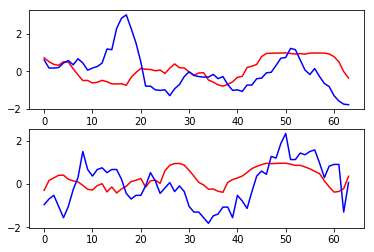

【res】 0 [array([1.3289348, 1.3020731, 1.376832 ], dtype=float32), [1.2480707]]
【res】 0 [array([1.223005 , 1.607516 , 0.9182957], dtype=float32), [1.1488283]]
【res】 0 [array([1.2623123 , 1.2137694 , 0.96919227], dtype=float32), [1.0697206]]
【res】 0 [array([1.2040107, 1.279299 , 1.030049 ], dtype=float32), [1.1205186]]
【res】 0 [array([0.97148407, 1.2913233 , 0.69921094], dtype=float32), [1.1216174]]
【res】 0 [array([1.3113834, 1.0460887, 1.0899187], dtype=float32), [1.1281699]]
【res】 0 [array([0.7452421, 1.3191098, 1.0388098], dtype=float32), [1.0622705]]
【res】 0 [array([1.1334907, 1.2713032, 1.0399615], dtype=float32), [1.0510198]]
【res】 0 [array([1.1018978 , 1.543856  , 0.80968595], dtype=float32), [1.2357534]]
【res】 0 [array([1.0145139, 1.0584407, 1.4403534], dtype=float32), [1.0724387]]
【res】 0 [array([1.1494302, 1.6015509, 0.9775612], dtype=float32), [0.88662857]]
【res】 0 [array([1.1737967, 1.3546387, 1.132202 ], dtype=float32), [0.9618643]]
【res】 0 [array([1.4290463 , 1.055025  , 0.

In [ ]:
#def main():

model_type = 'meta'
tf.set_random_seed(1234)
print(model_type, "att" in model_type, "meta" in model_type)
meta_lr = 1e-4
update_lr = 2e-4
cities = 3

#update_batch_size = alltime / seq_length
update_batch_size = 64

'''
(cities,alltime,seq_len,nodenum,features)
(alltime,seq_len,nodenum,features)
for i in alltime:
    (seq_len,nodenum,features)
    for i in seq_len:
        (nodenum,features)
        gat
        {
        
        }
'''
#站点距离阈值
distance = 20.0
test_num_updates = 1
dim_output = 1
dim_input = 8
seq_length = 7
hid_units = [8] # numbers of hidden units per each attention head in each layer
n_heads = [4, 1] # additional entry for the output layer
residual = False
nonlinearity = tf.nn.relu
iterations = 50
#测试的监测站id（0-42）
node_num = 8

model = STDN(dim_input=dim_input, dim_output=dim_output, seq_length=seq_length,node_num=node_num,
                     filter_num=64, dim_cnn_flatten=7*7*64,
                     dim_fc=16, dim_lstm_hidden=128,
                     update_lr=update_lr, meta_lr=meta_lr,
                     meta_batch_size=cities,
                     update_batch_size=update_batch_size,
                     test_num_updates=test_num_updates,
                     feature_size=17, nb_nodes=42,
                     hid_units=hid_units, n_heads=n_heads,
                     residual=residual, activation=nonlinearity)
model.construct_model()
sess = tf.InteractiveSession()
saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES), max_to_keep=10)

tf.global_variables_initializer().run()
tf.train.start_queue_runners()

#data_generator = DataGenerator(dim_input=dim_input,
                                   #dim_output=dim_output,
                                   #seq_length=seq_length,
                                   #threshold=threshold)
#if dim_output == 2:
    #data_generator.load_train_data(cities=cities, train_prop=0.8, select_data='all')
#else:
    #data_generator.load_train_data(cities=cities, train_prop=0.8, select_data='pick')

print("Data generate:")
trainnum = 6000
testnum = 2000
targetnum = 4800
drowtime = (trainnum / 60)
input_a, label_a,input_b, label_b,input_t,label_t,A = load_data2(distance,node_num,trainnum,testnum,targetnum)
biasesa = A[0:3,:,:]
biasesb = biasesa
print("Training:", model_type)
train(model, sess, saver)
print("Test:")
biasest = np.zeros([cities,42, 42])
biasest[0] = A[3,:,:]
biasest[1] = A[3,:,:]
biasest[2] = A[3,:,:]
test(model, sess, saver)